In [1]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
# load the selected bad channels
with open(os.path.join(workspace_root, 'Data', 'new.pkl'), "rb") as f:
    detected_noise = pickle.load(f)
import pandas as pd


In [2]:
# dict to df
dataframe = pd.DataFrame.from_dict(detected_noise, orient='index')
dataframe

,channel_names,trial_numbers,detection,noisy_components
601,"[D29, B27]","[57, 58, 59, 55, 106]","[[False, False, False, True, False, False, Fal...","[0, 4]"
602,[A32],"[19, 17, 20, 62, 69, 71, 75, 77, 78]","[[False, False, False, False, False, False, Fa...","[0, 6]"
603,[],"[1, 102, 49]","[[True, True, False, False, False, False, Fals...","[0, 3, 4, 6, 7, 8, 9]"
604,[A31],[],"[[False, False, False, False, False, False, Fa...","[0, 1, 2, 3, 4]"
605,[],"[55, 6, 19, 20, 21]","[[False, False, False, False, False, False, Fa...","[0, 3, 4, 5, 9, 11]"
606,[],[],"[[False, False, False, False, False, False, Fa...","[0, 9, 10, 11, 12]"
611,[],"[6, 86, 93]","[[False, False, False, False, False, False, Fa...","[1, 5]"
612,"[D23, A24, B6]","[14, 15, 17, 12, 77]","[[False, False, False, False, False, False, Fa...",[0]
614,"[D23, D24, C7, C8]","[19, 24, 99, 57, 56, 55]","[[False, False, False, False, False, False, Fa...",[0]
615,"[A17, D12, D22, D32]",[],"[[False, False, False, False, False, False, Fa...",[0]


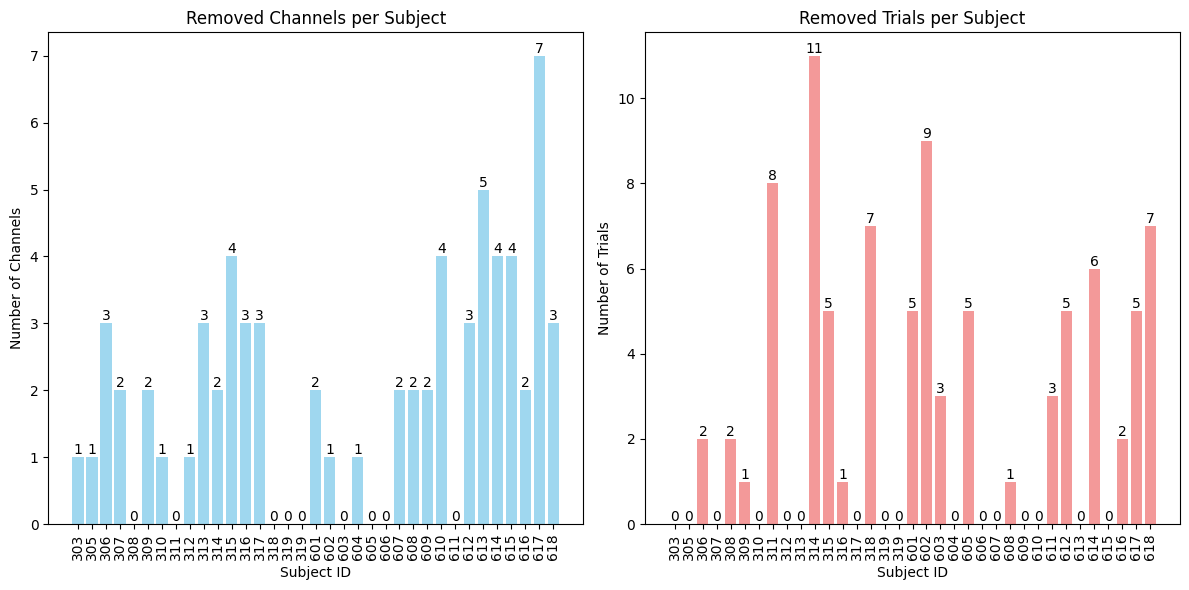

In [7]:
from config import young_adults_ids, old_adults_ids
ids = np.concatenate((young_adults_ids, old_adults_ids))
n_channels = []
nTrials = []
for id in ids:
    nChannel= len(detected_noise[id]['channel_names'])
    nTrial = len(detected_noise[id]['trial_numbers'])
    n_channels.append(nChannel)
    nTrials.append(nTrial)



# Plot the number of channels and trials per ID
plt.figure(figsize=(12, 6))

# Subplot for the number of channels
plt.subplot(1, 2, 1)
bars_channels = plt.bar(range(len(ids)), n_channels, color='skyblue', alpha=0.8)
plt.xlabel('Subject ID')
plt.ylabel('Number of Channels')
plt.title('Removed Channels per Subject')
plt.xticks(range(len(ids)), ids, rotation=90)  # Set x-ticks to exact subject IDs
for bar in bars_channels:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Subplot for the number of trials
plt.subplot(1, 2, 2)
bars_trials = plt.bar(range(len(ids)), nTrials, color='lightcoral', alpha=0.8)
plt.xlabel('Subject ID')
plt.ylabel('Number of Trials')
plt.title('Removed Trials per Subject')
plt.xticks(range(len(ids)), ids, rotation=90)  # Set x-ticks to exact subject IDs
for bar in bars_trials:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()